In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0203 19:14:01.130197 4489668032 deprecation.py:323] From <ipython-input-1-8bf8ae5a5303>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0203 19:14:01.131211 4489668032 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0203 19:14:01.132125 4489668032 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will 

Extracting MNIST_data/train-images-idx3-ubyte.gz


W0203 19:14:01.334295 4489668032 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0203 19:14:01.337288 4489668032 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0203 19:14:01.378936 4489668032 deprecation.py:323] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.con

Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import tensorflow as tf
import numpy as np
np.set_printoptions(suppress=True) 
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 64
LR_G = 0.0001           # learning rate for generator
LR_D = 0.0001           # learning rate for discriminator
N_IDEAS = 10             # think of this as number of ideas for generating an art work (Generator)
ART_COMPONENTS = 784     # it could be total point G can draw in the canvas

In [4]:
with tf.variable_scope('Generator'):
    G_in = tf.placeholder(tf.float32, [None, N_IDEAS])          # random ideas (could from normal distribution)
    G_l1 = tf.layers.dense(G_in, 2048, tf.nn.relu)
    G_out = tf.layers.dense(G_l1, ART_COMPONENTS)               # making a painting from these random ideas

with tf.variable_scope('Discriminator'):
    real_art = tf.placeholder(tf.float32, shape=[None, ART_COMPONENTS], name='real_in')   # receive art work from the famous artist
    D_l0 = tf.layers.dense(real_art, 2048, tf.nn.relu, name='l')
    artist_real = tf.layers.dense(D_l0, 1, tf.nn.sigmoid, name='out')              # probability that the art work is made by artist
    # reuse layers for generator
    D_l1 = tf.layers.dense(G_out, 2048, tf.nn.relu, name='l', reuse=True)            # receive art work from a newbie like G
    artist_fake = tf.layers.dense(D_l1, 1, tf.nn.sigmoid, name='out', reuse=True)  # probability that the art work is made by artist

W0203 19:14:01.734426 4489668032 deprecation.py:323] From <ipython-input-4-691de3984969>:3: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0203 19:14:01.737015 4489668032 deprecation.py:506] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1253: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = artist_real, labels = tf.ones_like(artist_real)))
# d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = artist_fake, labels = tf.zeros_like(artist_fake)))
# D_loss = d_loss_real + d_loss_fake
# G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = artist_fake, labels = tf.ones_like(artist_fake)))

# D_loss = tf.reduce_mean(tf.log(artist_real) + tf.log(1-artist_fake))
# G_loss = tf.reduce_mean(tf.log(1-artist_fake))
# G_loss = tf.reduce_mean(tf.log(artist_fake))

d_loss_real = tf.reduce_mean(tf.losses.log_loss(predictions = artist_real, labels = tf.ones_like(artist_real)))
d_loss_fake = tf.reduce_mean(tf.losses.log_loss(predictions = artist_fake, labels = tf.zeros_like(artist_fake)))
D_loss = d_loss_real + d_loss_fake
G_loss = tf.reduce_mean(tf.losses.log_loss(predictions = artist_fake, labels = tf.ones_like(artist_fake)))

train_D = tf.train.AdamOptimizer(LR_D).minimize(
    D_loss, var_list=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='Discriminator'))
train_G = tf.train.AdamOptimizer(LR_G).minimize(
    G_loss, var_list=tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='Generator'))

W0203 19:14:02.092691 4489668032 deprecation.py:506] From /Users/ianfan/anaconda3/envs/spinningup/lib/python3.6/site-packages/tensorflow/python/training/slot_creator.py:187: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

epoch: 0 d_loss: 0.114854872 g_loss: 3.849388123


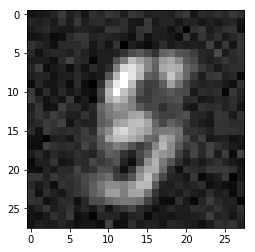

epoch: 1 d_loss: 0.138792008 g_loss: 3.546350002


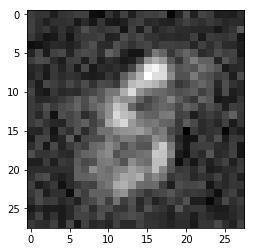

epoch: 2 d_loss: 0.166431397 g_loss: 3.003896236


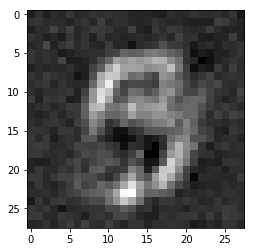

epoch: 3 d_loss: 0.108795688 g_loss: 3.617197990


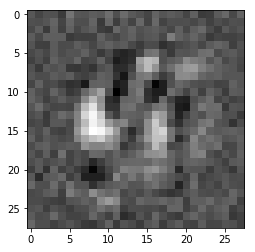

epoch: 4 d_loss: 0.172025070 g_loss: 3.442320585


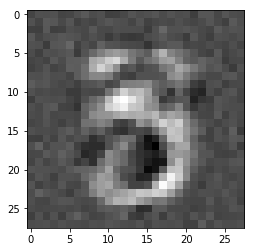

epoch: 5 d_loss: 0.154809773 g_loss: 3.253456116


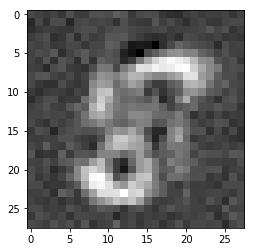

epoch: 6 d_loss: 0.160522848 g_loss: 3.212424755


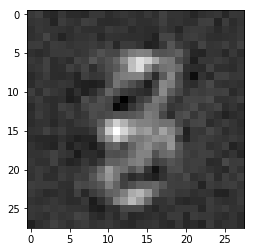

epoch: 7 d_loss: 0.141970411 g_loss: 3.186380386


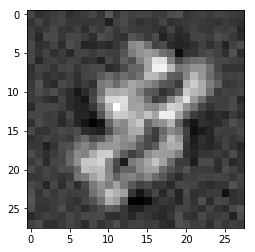

epoch: 8 d_loss: 0.119887307 g_loss: 3.754979610


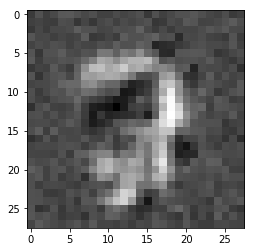

epoch: 9 d_loss: 0.156826288 g_loss: 3.157751560


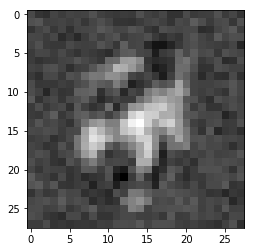

epoch: 10 d_loss: 0.151321515 g_loss: 2.890559196


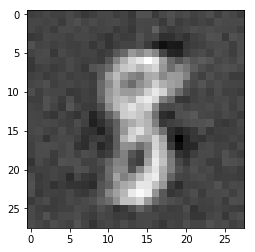

epoch: 11 d_loss: 0.159767956 g_loss: 3.751882076


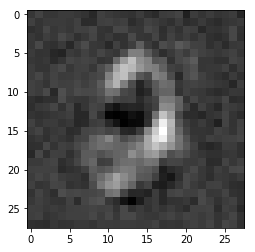

epoch: 12 d_loss: 0.084856346 g_loss: 3.706909657


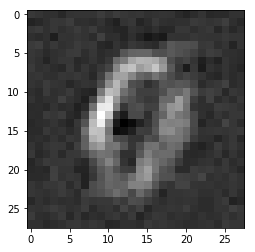

epoch: 13 d_loss: 0.194963276 g_loss: 3.305109501


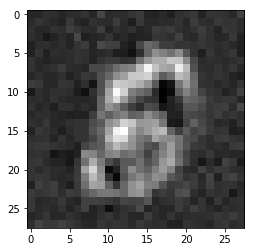

epoch: 14 d_loss: 0.143479973 g_loss: 3.639710426


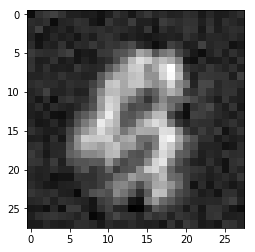

epoch: 15 d_loss: 0.154037312 g_loss: 3.386065006


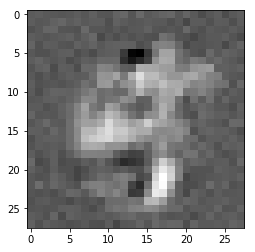

epoch: 16 d_loss: 0.260231227 g_loss: 3.570580959


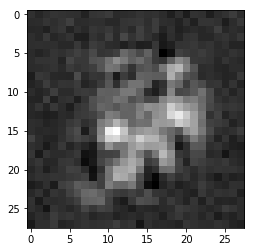

epoch: 17 d_loss: 0.135080829 g_loss: 3.724915981


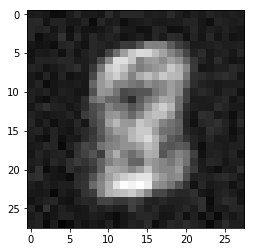

epoch: 18 d_loss: 0.113734670 g_loss: 3.507209301


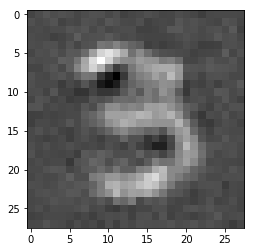

epoch: 19 d_loss: 0.249068037 g_loss: 4.069646835


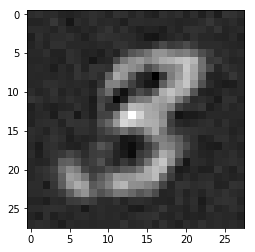

epoch: 20 d_loss: 0.132714242 g_loss: 3.621720314


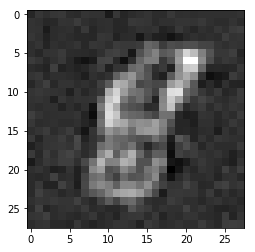

epoch: 21 d_loss: 0.132818118 g_loss: 3.548517704


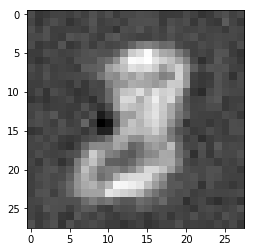

epoch: 22 d_loss: 0.068778619 g_loss: 4.377887249


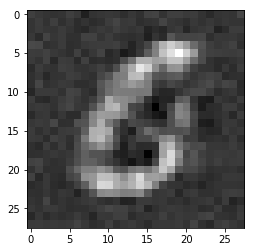

epoch: 23 d_loss: 0.148200914 g_loss: 4.180661201


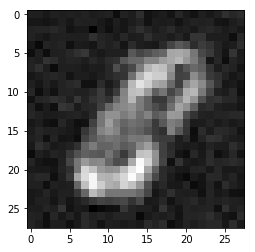

epoch: 24 d_loss: 0.109183431 g_loss: 4.349633217


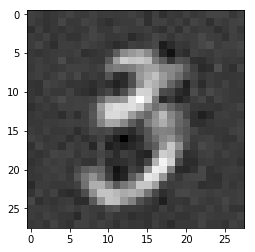

epoch: 25 d_loss: 0.119884759 g_loss: 4.162085056


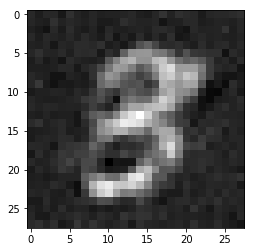

epoch: 26 d_loss: 0.126661301 g_loss: 3.902216434


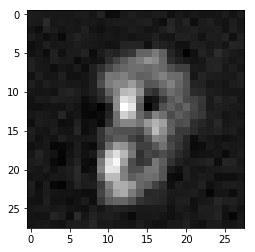

epoch: 27 d_loss: 0.068210520 g_loss: 4.867832661


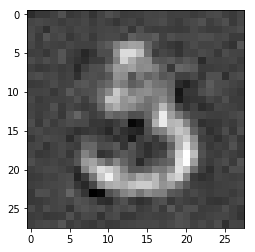

epoch: 28 d_loss: 0.139957607 g_loss: 4.695370674


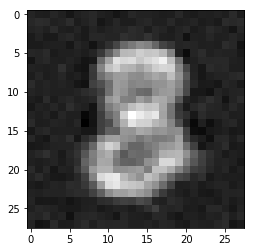

epoch: 29 d_loss: 0.096685886 g_loss: 4.344268799


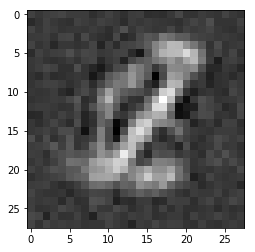

epoch: 30 d_loss: 0.181576610 g_loss: 5.025293350


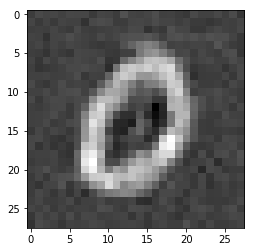

epoch: 31 d_loss: 0.129758060 g_loss: 4.252461433


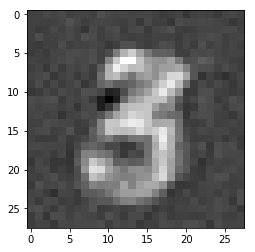

epoch: 32 d_loss: 0.076832265 g_loss: 4.452658653


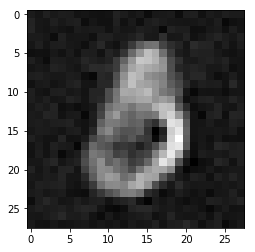

epoch: 33 d_loss: 0.104459375 g_loss: 4.022256851


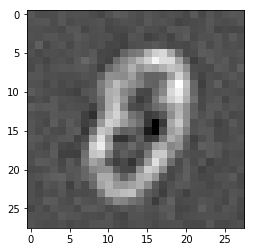

epoch: 34 d_loss: 0.171445385 g_loss: 5.154901028


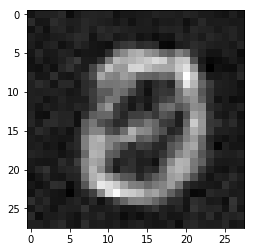

epoch: 35 d_loss: 0.151349247 g_loss: 4.195688248


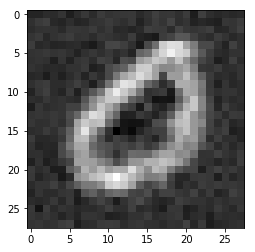

epoch: 36 d_loss: 0.099264055 g_loss: 5.584892273


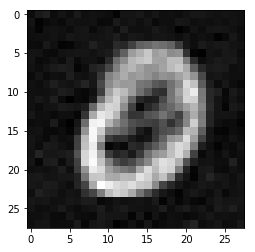

epoch: 37 d_loss: 0.085111409 g_loss: 4.859751701


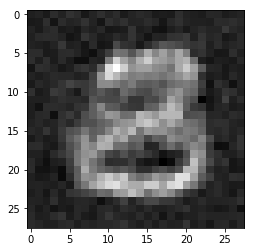

epoch: 38 d_loss: 0.088021174 g_loss: 4.704035759


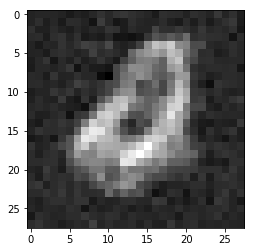

epoch: 39 d_loss: 0.081863806 g_loss: 5.359707832


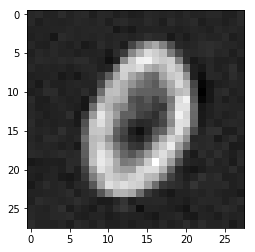

epoch: 40 d_loss: 0.153033048 g_loss: 4.874454975


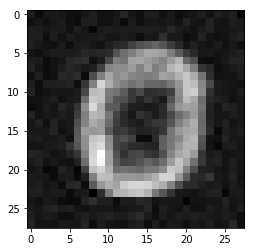

epoch: 41 d_loss: 0.104062632 g_loss: 4.145380020


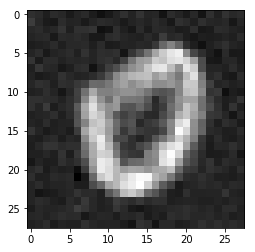

epoch: 42 d_loss: 0.080040462 g_loss: 4.512979507


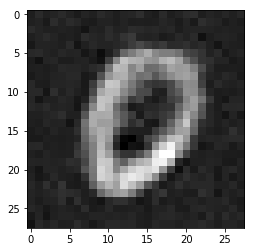

epoch: 43 d_loss: 0.028785586 g_loss: 5.004109859


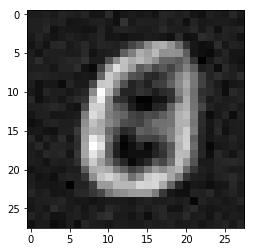

epoch: 44 d_loss: 0.081001796 g_loss: 4.923020840


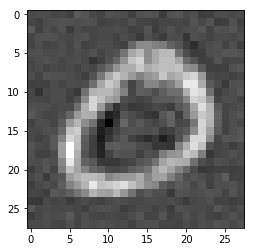

epoch: 45 d_loss: 0.051151022 g_loss: 4.871158600


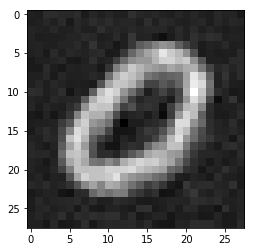

epoch: 46 d_loss: 0.081170648 g_loss: 4.453308582


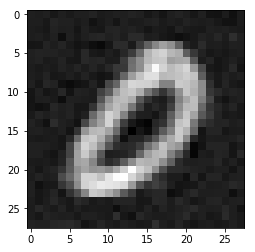

epoch: 47 d_loss: 0.055275358 g_loss: 4.237055779


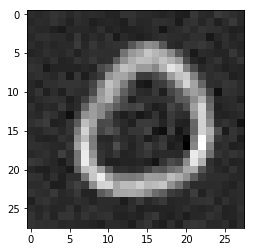

epoch: 48 d_loss: 0.215045244 g_loss: 4.840766430


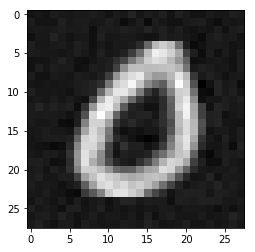

epoch: 49 d_loss: 0.087255791 g_loss: 4.564275742


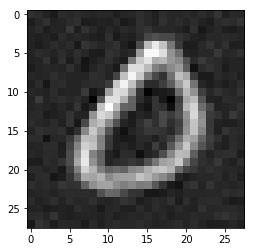

epoch: 50 d_loss: 0.129442200 g_loss: 4.979853153


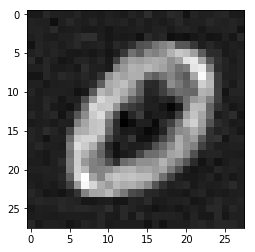

epoch: 51 d_loss: 0.138407826 g_loss: 4.314835548


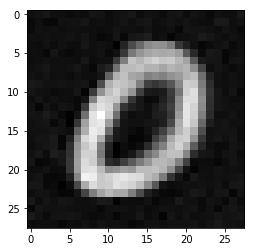

epoch: 52 d_loss: 0.194779187 g_loss: 5.472209930


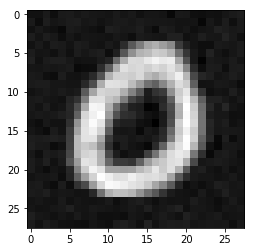

epoch: 53 d_loss: 0.067569956 g_loss: 4.207710743


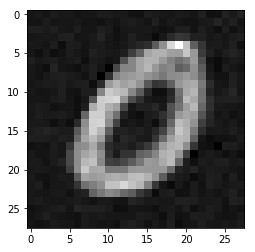

epoch: 54 d_loss: 0.181957632 g_loss: 3.456712723


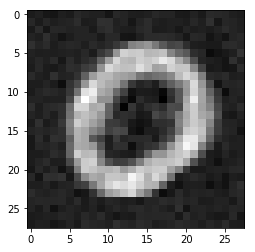

epoch: 55 d_loss: 0.034193613 g_loss: 4.503247738


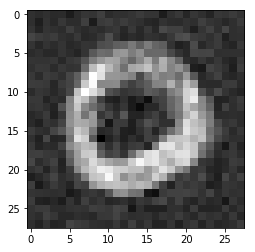

epoch: 56 d_loss: 0.144289285 g_loss: 4.978089333


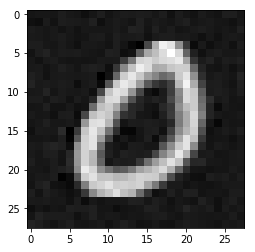

epoch: 57 d_loss: 0.068147190 g_loss: 4.376446247


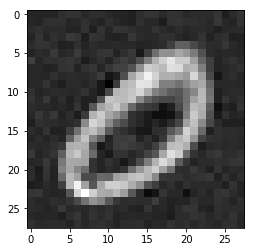

epoch: 58 d_loss: 0.070622429 g_loss: 4.787253380


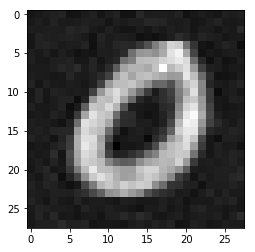

epoch: 59 d_loss: 0.057088256 g_loss: 5.204994202


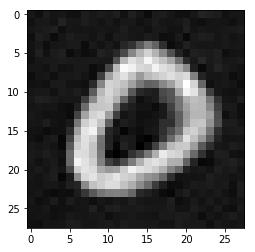

epoch: 60 d_loss: 0.068400323 g_loss: 5.542677879


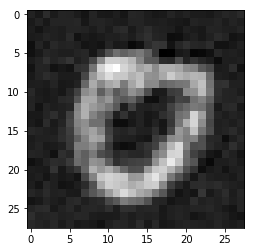

epoch: 61 d_loss: 0.084266298 g_loss: 4.749454498


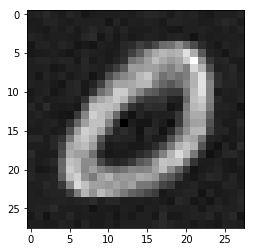

epoch: 62 d_loss: 0.055495821 g_loss: 4.885207176


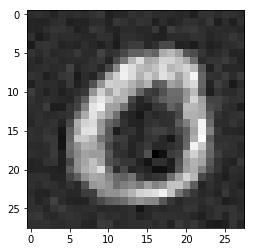

epoch: 63 d_loss: 0.038091019 g_loss: 4.705573559


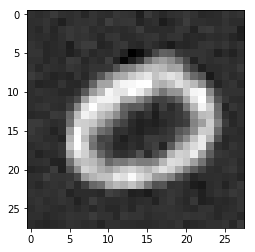

epoch: 64 d_loss: 0.066737130 g_loss: 4.985704422


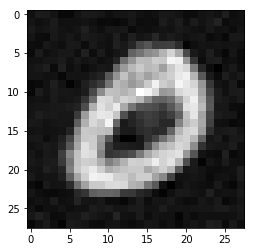

epoch: 65 d_loss: 0.112602219 g_loss: 5.620012283


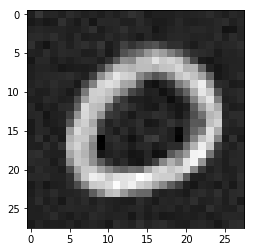

epoch: 66 d_loss: 0.023102351 g_loss: 4.899196625


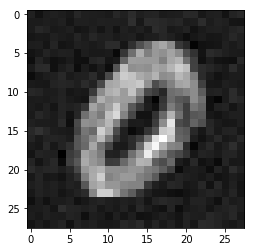

epoch: 67 d_loss: 0.074809395 g_loss: 5.071320534


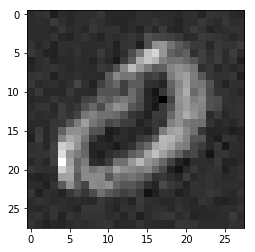

epoch: 68 d_loss: 0.063080423 g_loss: 5.669393539


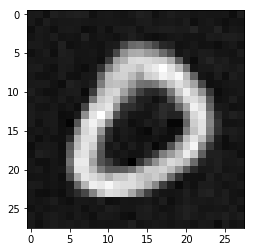

epoch: 69 d_loss: 0.084401578 g_loss: 6.170077324


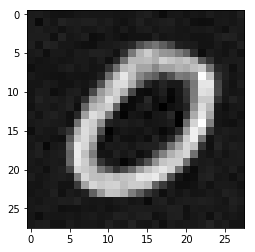

epoch: 70 d_loss: 0.034917351 g_loss: 5.796596050


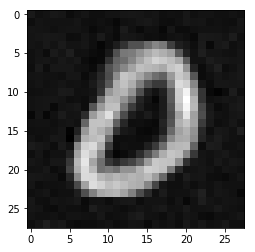

epoch: 71 d_loss: 0.036330089 g_loss: 5.155189991


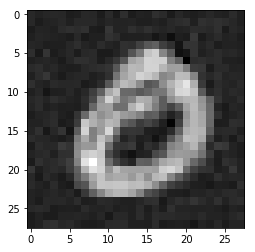

epoch: 72 d_loss: 0.071606144 g_loss: 5.002023697


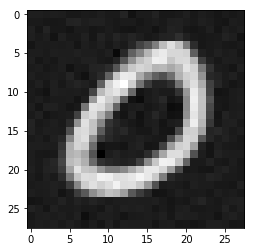

epoch: 73 d_loss: 0.088123910 g_loss: 4.537028313


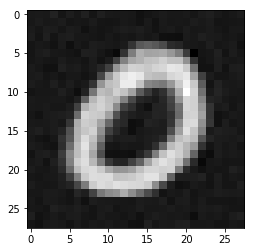

epoch: 74 d_loss: 0.014617266 g_loss: 5.973613739


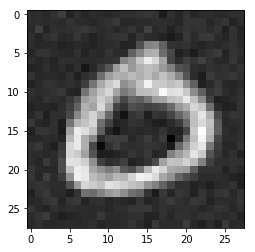

epoch: 75 d_loss: 0.089370400 g_loss: 4.434054375


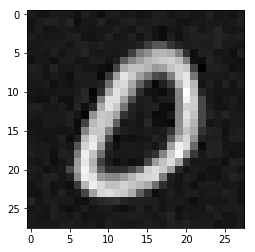

epoch: 76 d_loss: 0.022888642 g_loss: 5.599484444


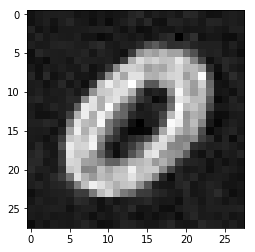

epoch: 77 d_loss: 0.038417894 g_loss: 5.295398712


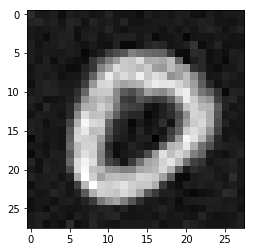

epoch: 78 d_loss: 0.058381181 g_loss: 5.197052002


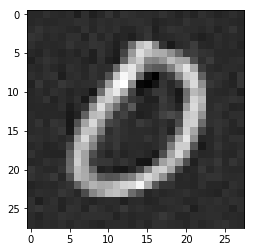

epoch: 79 d_loss: 0.024553070 g_loss: 4.821717262


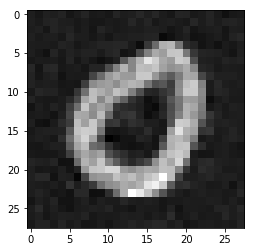

epoch: 80 d_loss: 0.157993585 g_loss: 3.469897270


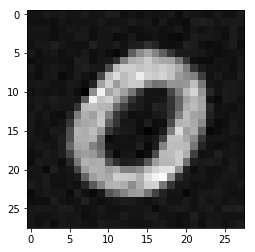

epoch: 81 d_loss: 0.117863528 g_loss: 5.258412361


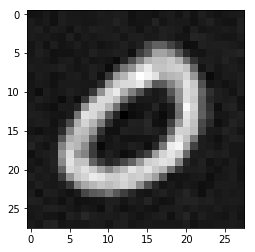

epoch: 82 d_loss: 0.024202172 g_loss: 4.621493340


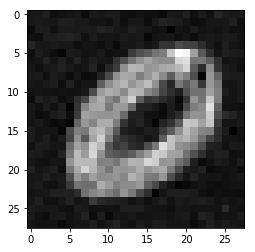

epoch: 83 d_loss: 0.076279633 g_loss: 4.392152786


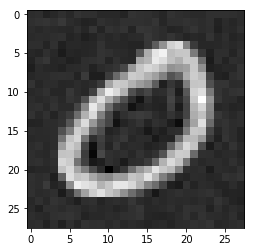

epoch: 84 d_loss: 0.018966254 g_loss: 6.021469116


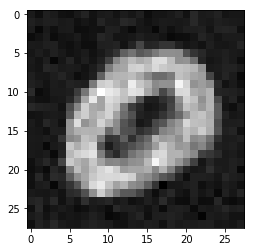

epoch: 85 d_loss: 0.077060118 g_loss: 4.845273972


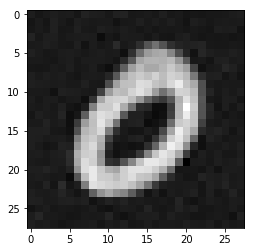

epoch: 86 d_loss: 0.075702325 g_loss: 6.217304230


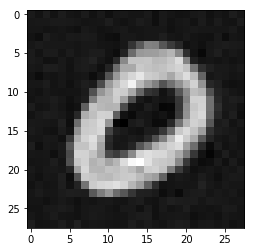

epoch: 87 d_loss: 0.046581108 g_loss: 5.411486149


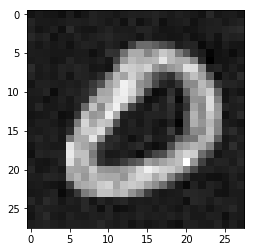

epoch: 88 d_loss: 0.146892384 g_loss: 5.729768753


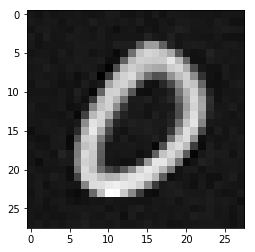

epoch: 89 d_loss: 0.030778481 g_loss: 5.467369556


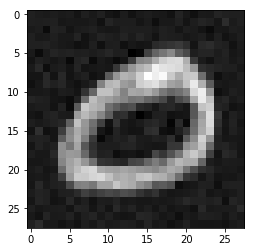

epoch: 90 d_loss: 0.082033873 g_loss: 4.862769127


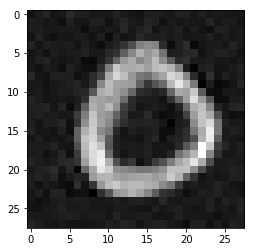

epoch: 91 d_loss: 0.134806201 g_loss: 5.860780239


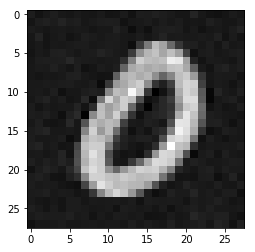

epoch: 92 d_loss: 0.035227764 g_loss: 4.613842010


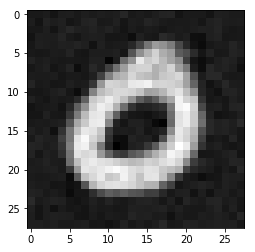

epoch: 93 d_loss: 0.051618271 g_loss: 4.792115211


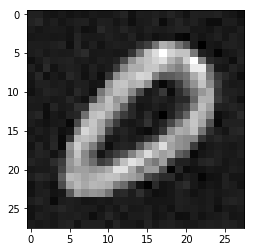

epoch: 94 d_loss: 0.106581002 g_loss: 5.990483284


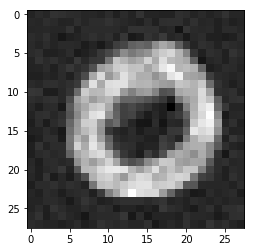

epoch: 95 d_loss: 0.041991837 g_loss: 4.309471130


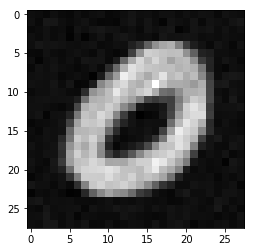

epoch: 96 d_loss: 0.008114297 g_loss: 6.059450150


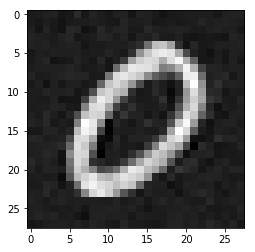

epoch: 97 d_loss: 0.046848226 g_loss: 4.275896549


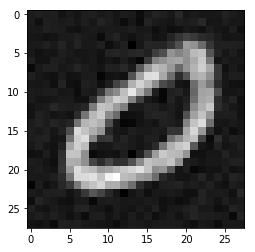

epoch: 98 d_loss: 0.020304956 g_loss: 5.005012035


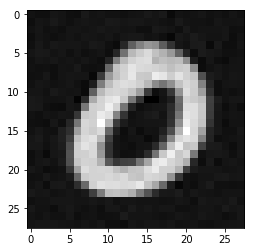

epoch: 99 d_loss: 0.017429441 g_loss: 5.253720760


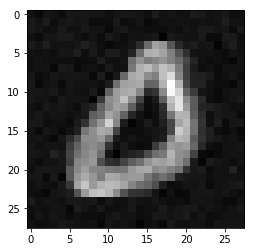

In [8]:
plt.ion()   # something about continuous plotting

training_epochs = 10

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples/BATCH_SIZE)
    for batch in range(total_batch):
        G_ideas = np.random.randn(BATCH_SIZE, N_IDEAS)
        x_train_batch, y_train_batch = mnist.train.next_batch(BATCH_SIZE)
        G_paintings, pa0, dl_, d_, gl_, g_ = sess.run([G_out, artist_real, D_loss, train_D, G_loss, train_G], {G_in: G_ideas, real_art: x_train_batch})
#     for batch in range(total_batch):  
#         G_ideas = np.random.randn(BATCH_SIZE, N_IDEAS)
#         x_train_batch, y_train_batch = mnist.train.next_batch(BATCH_SIZE)
#         dl_, d_ = sess.run([D_loss, train_D], {G_in: G_ideas, real_art: x_train_batch})
    print('epoch: %d'%epoch, 'd_loss: %.9f'%dl_, 'g_loss: %.9f'%gl_)
#     for batch in range(total_batch):
#         G_ideas = np.random.randn(BATCH_SIZE, N_IDEAS)
#         gl_, g_ = sess.run([G_loss, train_G], {G_in: G_ideas})
    plt.cla()
    x_g_img = G_paintings[0].reshape(28,28)
    plt.imshow(x_g_img, cmap="gray")
    plt.show()
#     plt.plot(PAINT_POINTS[0], G_paintings[0], c='#4AD631', lw=3, label='Generated painting',)
#     plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
#     plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
#     plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % pa0.mean(), fontdict={'size': 15})
#     plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -Dl, fontdict={'size': 15})
#     plt.ylim((0, 3)); plt.legend(loc='upper right', fontsize=12); plt.draw(); plt.pause(0.01)
plt.ioff()
plt.show()

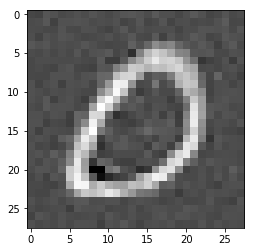

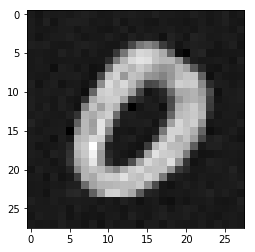

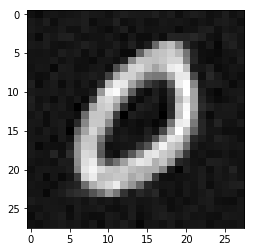

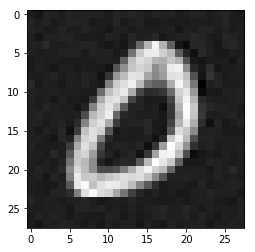

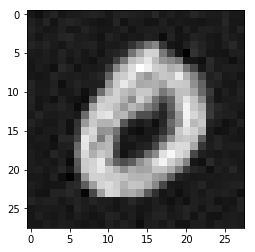

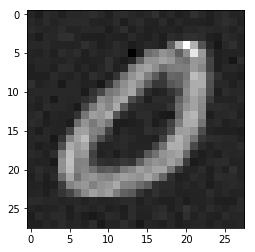

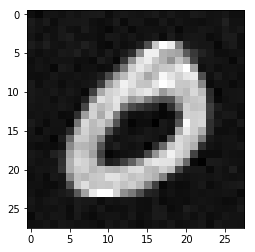

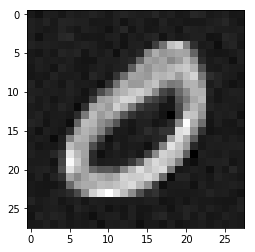

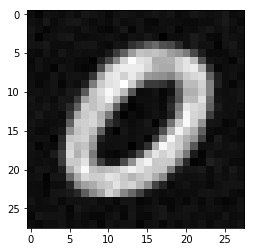

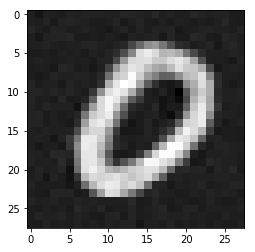

In [12]:
for _ in range(10):
    x_new = np.random.randn(1, N_IDEAS)
    x_g_out = sess.run(G_out, feed_dict={G_in:x_new})
    x_g_img = x_g_out.reshape(28,28)
    plt.imshow(x_g_img, cmap="gray")
    plt.show()